In [40]:
!unzip /content/drive/MyDrive/Dataset.zip

Archive:  /content/drive/MyDrive/Dataset.zip
 extracting: findit/val_json.txt     
 extracting: findit/train_json.txt   
 extracting: findit/test_json.txt    
 extracting: findit/findit2/val.txt  
 extracting: findit/findit2/test.txt  
 extracting: findit/findit2/train.txt  
 extracting: findit/findit2/val_bm/X51006828201.png  
 extracting: findit/findit2/val_bm/X51008114283.png  
 extracting: findit/findit2/val_bm/X51005441401.png  
 extracting: findit/findit2/val_bm/X51005757304.png  
 extracting: findit/findit2/val_bm/X51005605333.png  
 extracting: findit/findit2/val_bm/X51005711404.png  
 extracting: findit/findit2/val_bm/X00016469612.png  
 extracting: findit/findit2/val_bm/X51005568890.png  
 extracting: findit/findit2/val_bm/X51007419197.png  
 extracting: findit/findit2/val_bm/X51006414636.png  
 extracting: findit/findit2/val_bm/X51005806702.png  
 extracting: findit/findit2/val_bm/X51006008086.png  
 extracting: findit/findit2/val_bm/X51006393377.png  
 extracting: findit/fi

In [39]:
# !rm -r /content/Dataset.zip
# !rm -r /content/findit

In [41]:
!mkdir /content/findit/findit2/train_patches
!mkdir /content/findit/findit2/train_patches_masks
!mkdir /content/findit/findit2/train_patches_bm

!mkdir /content/findit/findit2/test_patches
!mkdir /content/findit/findit2/test_patches_masks
!mkdir /content/findit/findit2/test_patches_bm

!mkdir /content/findit/findit2/val_patches
!mkdir /content/findit/findit2/val_patches_masks
!mkdir /content/findit/findit2/val_patches_bm



In [23]:
!rm -r /content/findit/findit2/train_patches
!rm -r /content/findit/findit2/train_patches_masks
!rm -r /content/findit/findit2/train_patches_bm

!rm -r /content/findit/findit2/test_patches
!rm -r /content/findit/findit2/test_patches_masks
!rm -r /content/findit/findit2/test_patches_bm

!rm -r /content/findit/findit2/val_patches
!rm -r /content/findit/findit2/val_patches_masks
!rm -r /content/findit/findit2/val_patches_bm

In [4]:
import os
import pandas as pd
import cv2
import numpy as np

In [47]:
def read_forged_image_names(csv_path):
    """Read CSV file to get names of forged images."""
    df = pd.read_csv(csv_path)
    forged_image_names = df[df['forged'] == 1]['filename'].tolist()

    return forged_image_names

def create_patches(image, patch_size):
    """Split the image into patches of size patch_size x patch_size."""
    patches = []
    h, w, _ = image.shape

    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):

            patch = image[i:i + patch_size, j:j + patch_size]
            if patch.shape[0] == patch_size and patch.shape[1] == patch_size:
                patches.append(patch)

    return patches

def save_patches(patches, output_dir, base_name):
    """Save the patches to the specified directory."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for idx, patch in enumerate(patches):
        patch_filename = f"{base_name}_patch_{idx}.png"
        cv2.imwrite(os.path.join(output_dir, patch_filename), patch)

def resize_to_nearest_multiple(image, patch_size):
    """Resize image to the nearest dimensions that are multiples of patch_size."""
    h, w = image.shape[:2]
    new_h = (h // patch_size) * patch_size
    new_w = (w // patch_size) * patch_size
    resized_image = cv2.resize(image, (new_w, new_h))

    return resized_image

def process_images(forged_image_names, image_dir, mask_dir, binary_mask_dir, images_output_dir, masks_output_dir, bm_output_dir, patch_size = 64):
    """Process the images and save the patches."""
    for image_name in forged_image_names:
        print(f"img name = {image_name}")
        base_name = os.path.splitext(image_name)[0]

        # Load images
        image_path = os.path.join(image_dir, image_name)
        mask_path = os.path.join(mask_dir, image_name)
        binary_mask_path = os.path.join(binary_mask_dir, image_name)

        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)
        binary_mask = cv2.imread(binary_mask_path)

        if image is None or mask is None or binary_mask is None:
            print(f"Skipping {image_name} as one or more files are missing")
            continue

        # Resize images if necessary
        if image.shape != mask.shape:
            image = cv2.resize(image, (mask.shape[1], mask.shape[0]))
        if binary_mask.shape != mask.shape:
            binary_mask = cv2.resize(binary_mask, (mask.shape[1], mask.shape[0]))


        # Resize images to nearest multiple of patch_size
        image = resize_to_nearest_multiple(image, patch_size)
        mask = resize_to_nearest_multiple(mask, patch_size)
        binary_mask = resize_to_nearest_multiple(binary_mask, patch_size)

        # Create patches
        image_patches = create_patches(image, patch_size)
        mask_patches = create_patches(mask, patch_size)
        binary_mask_patches = create_patches(binary_mask, patch_size)

        # Save patches
        # image_output_dir = os.path.join(output_dir, 'images')
        # mask_output_dir = os.path.join(masks_output_dir, 'masks')
        # binary_mask_output_dir = os.path.join(bm_output_dir, 'binary_masks')

        save_patches(image_patches, images_output_dir, base_name)
        save_patches(mask_patches, masks_output_dir, base_name)
        save_patches(binary_mask_patches, bm_output_dir, base_name)

def main():
    #### VALIDATION ####
    # csv_path          = '/content/val.csv'
    # image_dir         = '/content/findit/findit2/val'
    # mask_dir          = '/content/findit/findit2/val_masks'
    # binary_mask_dir   = '/content/findit/findit2/val_bm'
    # images_output_dir = '/content/findit/findit2/val_patches'
    # masks_output_dir  = '/content/findit/findit2/val_patches_masks'
    # bm_output_dir     = '/content/findit/findit2/val_patches_bm'

    #### TEST ####
    # csv_path          = '/content/test.csv'
    # image_dir         = '/content/findit/findit2/test'
    # mask_dir          = '/content/findit/findit2/test_masks'
    # binary_mask_dir   = '/content/findit/findit2/test_bm'
    # images_output_dir = '/content/findit/findit2/test_patches'
    # masks_output_dir  = '/content/findit/findit2/test_patches_masks'
    # bm_output_dir     = '/content/findit/findit2/test_patches_bm'

    # #### TRAIN ####
    csv_path          = '/content/train.csv'
    image_dir         = '/content/findit/findit2/train'
    mask_dir          = '/content/findit/findit2/train_masks'
    binary_mask_dir   = '/content/findit/findit2/train_bm'
    images_output_dir = '/content/findit/findit2/train_patches'
    masks_output_dir  = '/content/findit/findit2/train_patches_masks'
    bm_output_dir     = '/content/findit/findit2/train_patches_bm'

    forged_image_names = read_forged_image_names(csv_path)
    process_images(forged_image_names, image_dir, mask_dir, binary_mask_dir, images_output_dir, masks_output_dir, bm_output_dir)

if __name__ == "__main__":
    main()


img name = X00016469622.png
img name = X51005230617.png
img name = X51005361906.png
img name = X51005361946.png
img name = X51005365179.png
img name = X51005433522.png
img name = X51005433553.png
img name = X51005442327.png
img name = X51005442379.png
img name = X51005447833.png
img name = X51005447840.png
img name = X51005447850.png
img name = X51005447861.png
img name = X51005568855.png
img name = X51005568881.png
img name = X51005568885.png
img name = X51005568889.png
img name = X51005587254.png
img name = X51005605285.png
img name = X51005663274.png
img name = X51005663293.png
img name = X51005663317.png
img name = X51005675914.png
img name = X51005676535.png
img name = X51005676540.png
img name = X51005677333.png
img name = X51005677339.png
img name = X51005710963.png
img name = X51005711443.png
img name = X51005712039.png
img name = X51005719823.png
img name = X51005719888.png
img name = X51005722699.png
img name = X51005724609.png
img name = X51005745183.png
img name = X51005757

In [48]:
import os

def get_number_of_files(folder_path):
    """Return the number of files in a given folder."""
    if not os.path.exists(folder_path):
        return 0
    return len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])

# Example usage:
# folder_path = '/content/findit/findit2/train_patches_bm'
print(f"Number of files in folder: {get_number_of_files('/content/findit/findit2/train_patches')}")
print(f"Number of files in folder: {get_number_of_files('/content/findit/findit2/train_patches_masks')}")
print(f"Number of files in folder: {get_number_of_files('/content/findit/findit2/train_patches_bm')}")

Number of files in folder: 1205
Number of files in folder: 1205
Number of files in folder: 1205


In [49]:
!rm -r /content/findit/findit2/test
!rm -r /content/findit/findit2/test_bm
!rm -r /content/findit/findit2/test_masks

!rm -r /content/findit/findit2/train
!rm -r /content/findit/findit2/train_bm
!rm -r /content/findit/findit2/train_masks

!rm -r /content/findit/findit2/val
!rm -r /content/findit/findit2/val_bm
!rm -r /content/findit/findit2/val_masks


!rm -r /content/findit/findit2/test.txt
!rm -r /content/findit/findit2/train.txt
!rm -r /content/findit/findit2/val.txt

!rm -r /content/findit/test_json.txt
!rm -r /content/findit/train_json.txt
!rm -r /content/findit/val_json.txt

In [50]:
import shutil
import os

shutil.make_archive('/content/Dataset', 'zip', '/content/findit')

'/content/Dataset.zip'

image = (1013, 463, 3)
mask = (369, 168, 3)
bm = (1013, 463, 3)
resized mask = (1013, 463, 3)


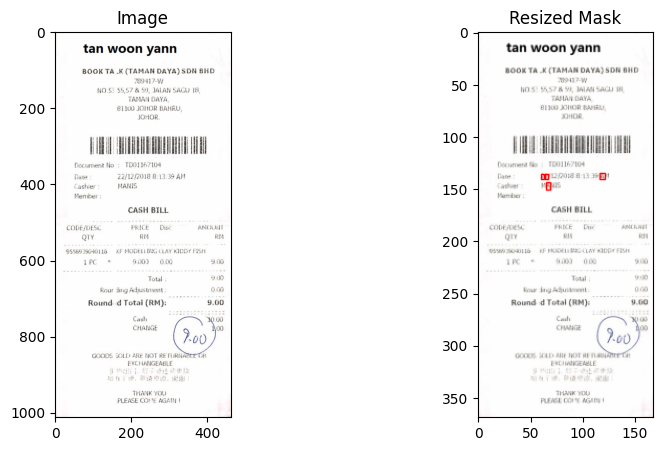

In [22]:
# import cv2
# import matplotlib.pyplot as plt


# image = cv2.imread('/content/findit/findit2/val/X00016469612.png')
# mask = cv2.imread('/content/findit/findit2/val_masks/X00016469612.png')
# binary_mask = cv2.imread('/content/findit/findit2/val_bm/X00016469612.png')

# print(f"image = {image.shape}")
# print(f"mask = {mask.shape}")
# print(f"bm = {binary_mask.shape}")

# # Resize the mask to match the shape of the image
# resized_mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

# # Print the shape of the resized mask
# print(f"resized mask = {resized_mask.shape}")

# # Plot the original image and the resized mask
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title('Image')
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# plt.subplot(1, 2, 2)
# plt.title('Resized Mask')
# plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

# plt.show()